<a href="https://colab.research.google.com/github/sochachai/Denoising_Automatic_Encoder/blob/main/Denoising_Automatic_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation of dependencies and Import data

In [ ]:
# Installing libraries
!pip install tensorflow numpy matplotlib

# Loading  dataset
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.

Preprocess data

In [ ]:
import numpy as np
# Add noise to the images
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the images to the valid pixel range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
#x_train = np.clip(x_train, 0., 1.)
#x_test = np.clip(x_test, 0., 1.)


# Normalize the pixel values
#x_train_noisy = x_train_noisy / 255.
#x_test_noisy = x_test_noisy / 255.
#x_train = x_train / 255.
#x_test = x_test / 255.

# Note we must enforce the elements of x_train_noisy, x_train, x_test_noisy, x_test to be within values between 0 and 1 for binary_entropy to function correctly
# For more info, please refer to https://stackoverflow.com/questions/42264649/keras-binary-crossentropy-has-negative-values

Define Model

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Define the model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Train model

In [ ]:
# Train the model
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=10, validation_data=(x_test_noisy, x_test))
# batch size = 512 lead to white image for denoise picture
# Large batch size uses less time but results in inaccuracy
# Small batach size uses more time but results in better accuracy

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0970 - val_loss: 0.0690
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0690 - val_loss: 0.0676
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0679 - val_loss: 0.0669
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0673 - val_loss: 0.0667
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0670 - val_loss: 0.0664
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0668 - val_loss: 0.0662
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0666 - val_loss: 0.0660
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0665 - val_loss: 0.0660
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0663 - val_loss: 0.0659
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0663 - val_loss: 0.0660


Denoise Image

In [ ]:
# Using model to denoise the images
denoised_images = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
np.max(denoised_images)

0.9991534

In [ ]:
np.min(denoised_images)

8.917408e-19

Visualize Image

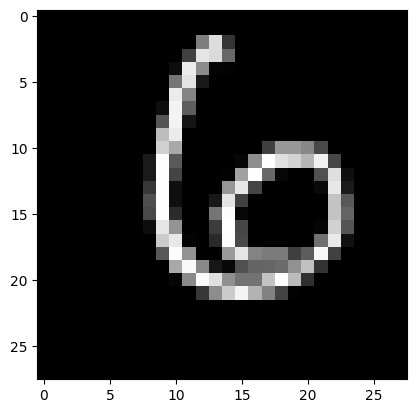

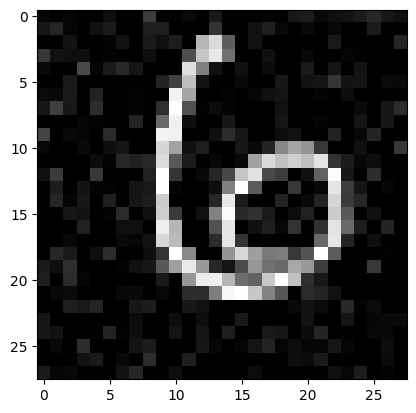

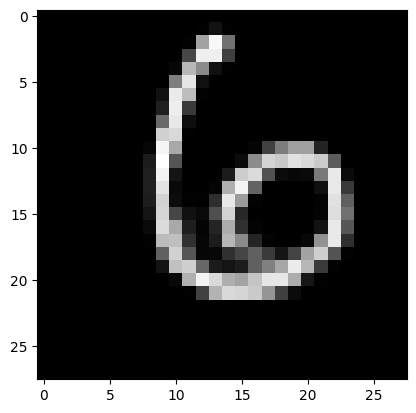

In [ ]:
import matplotlib.pyplot as plt

# Display the first image in the test set
plt.imshow(x_test[100], cmap='gray')
plt.show()

# Display the first image in the noisy test set
plt.imshow(x_test_noisy[100], cmap='gray')
plt.show()

# Display the first image in the denoised test set
plt.imshow(denoised_images[100].squeeze(), cmap='gray')
plt.show()